In [4]:
import ThreeD_Net_Tools_0203 as D3

import sys
import math
import numpy as np #v 1.23.3
import networkx as nx
import matplotlib.cm as cm
import matplotlib
import argparse
import matplotlib.pyplot as plt
import itertools
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from networkx.algorithms import community
import community
from community import community_louvain #conda install python-louvain
from PIL import Image
import os
import scipy
from numpy import roots
import random
import ast
import pickle
import re
#%matplotlib notebook

In [5]:
from networkx.utils import py_random_state


In [6]:
USR='LUKE'

In [7]:
#os.getcwd()
list_paths_skl=[]
list_paths_vol=[]
if USR=='LUKE':
    ALL_ANALYSIS='ALL_GAUDI.csv'#finalfilename
    #directory="/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/CURRENT_Gs/03-05-23_4"
    directory="/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/CURRENT_Gs/01-05-23_2"
    clean_Gs=directory+'/GRAPHS/CLEANED'
    dir_G=clean_Gs+"/BASE"
    dir_G_widths=clean_Gs+'/WIDTH'
    dir_G_widths_o=clean_Gs+'/WIDTH_O'
    #dir_G_coords=directory+"/COORDS"
    pickle_f=directory+"/_keyed_nodes.pickle"
    
    os.chdir(directory)
    #os.chdir("/media/ll16598/One Touch/CT_ANALYSIS/")
    #VOXEL_SIZES = pd.read_csv('/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/ANALYSIS/VOXEL_SIZES.csv')

elif USR=='SUPER':
    directory="/media/cf19810/One Touch/CT_ANALYSIS"
    dir_G="/media/cf19810/One Touch/CT_ANALYSIS/GRAPHS/BASE"
    dir_G_inverted='/media/cf19810/One Touch/CT_ANALYSIS/GRAPHS/INVERTED'
    dir_G_widths=clean_Gs+'/WIDTHS'
    dir_G_widths_inverted='/media/cf19810/One Touch/CT_ANALYSIS/GRAPHS/WIDTHS_INVERTED'
    dir_G_short="/media/cf19810/One Touch/CT_ANALYSIS/GRAPHS/SHORT"
    dir_G_spatial="/media/cf19810/One Touch/CT_ANALYSIS/GRAPHS/SPATIAL"
    dir_G_short_widths="/media/cf19810/One Touch/CT_ANALYSIS/GRAPHS/SHORT_WIDTH"
    dir_G_spatial_widths="/media/cf19810/One Touch/CT_ANALYSIS/GRAPHS/SPATIAL_WIDTH"
    
    os.chdir("/media/cf19810/One Touch/CT_ANALYSIS")
    VOXEL_SIZES = pd.read_csv('/home/cf19810/Documents/LUKE/VOXEL_SIZES.csv')

In [8]:
clean_Gs=directory+'/GRAPHS/CLEANED'

In [9]:
TREATS = pd.read_csv('/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/ANALYSIS/COLONY_INFO.csv')
analysis_df=TREATS
name_list=[]
for i in TREATS['name']:
    name_list.append(i)

In [10]:
DOL='1'
max_l=100
DIR_G_ANA='/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/ABM_DATA/NET_DATA/SOCIAL_NET_ANA'
files = [ f.path for f in os.scandir(DIR_G_ANA)]
l=0
dfs=[]
list_data=[]
list_nk=[]
t_range=['0-3', '3-6', '6-9', '9-12']
subset_list=[1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,9,9,10,10,1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,9,9,10,10]
for file in range(0,len(files)):
    nodes1_filename = os.path.basename(files[file])
    #it = re.search(r'_IT_([\d_]+)', nodes1_filename).group(1)
    it =  re.search(r"_([\d\.]+)\.pickle$", nodes1_filename)
	
    # Extracting numbers from square brackets
    import re

    match = re.search(r'\[([\d., -]+)\]', nodes1_filename)
    if match:
        nk = match.group(1)[0]
        #print(numbers)
    else:
        print("No match found")
    if nk!=DOL:
        continue
    s_df=pd.read_csv(files[file])
    it_list=[]
    for i in range(0,len(s_df)):
        it_list.append(l)
    s_df['iteration']=it_list
    dfs.append(s_df)
    l+=1
    if len(dfs)==max_l:
        break

result_df = pd.concat(dfs, ignore_index=True)
print(l)

100


In [11]:
def convert_to_list(value):
    if isinstance(value, str):
        try:
            return ast.literal_eval(value)
        except ValueError:
            return value
    else:
        return value

In [12]:
variables = ['efficiency_list', 'heterogeneity_list', 'modularity_list', 'clustering_list']
#variables = ['assortativity_list_all', 'heterogeneity_list', 'modularity_list', 'clustering_list']

var='density_list'

In [13]:

result_df[var] = result_df[var].apply(convert_to_list)
result_df_new = result_df.explode(var)
t_chunks=[]
for i in range(len(result_df_new[var])):
    t_chunks.append(t_range[i % 4])
result_df_new['t_chunks']=t_chunks


for var in variables:
    result_df[var] = result_df[var].apply(convert_to_list)  # Assuming you have the function 'convert_to_list'
    result_df2 = result_df.explode(var)
    result_df2[var] = pd.to_numeric(result_df2[var], errors='coerce')
    print(len(result_df), len(result_df2))
    result_df_new[var]=result_df2[var]

3960 15840
3960 15840
3960 15840
3960 15840


In [86]:
save_dir='/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/ABM_CODE'
result_df_new.to_csv(save_dir+'/'+DOL+'_combined_social_analysis.csv',index=False)#S+PARAMETERS
print('data saved as:', DOL+'_combined_social_analysis.csv')

data saved as: 1_combined_social_analysis.csv


In [14]:

print('data saved as:', DOL+'_combined_social_analysis.csv')
result_df=result_df_new
variables = ['density_list','efficiency_list', 'heterogeneity_list', 'modularity_list', 'clustering_list']
#variables = ['assortativity_list_all','efficiency_list_all', 'heterogeneity_list_all', 'modularity_list_all', 'clustering_list_all']

new_columns = ['Density', 'Efficiency', 'Weighted degree heterogeneity', 'Modularity', 'Clustering']

# Create a dictionary mapping old column names to new column names
rename_dict = {old: new for old, new in zip(variables, new_columns)}

# Rename columns in the dataframe
result_df = result_df.rename(columns=rename_dict)
result_df = result_df.rename(columns={'treat_list': 'Architecture'})

# Replacing values in the new column
result_df['Architecture'] = result_df['Architecture'].replace({
    'SHAM': 'Control',
    'PATHOGEN': 'Pathogen'
})

data saved as: 1_combined_social_analysis.csv


In [15]:

result_df = result_df.rename(columns={'treat_list': 'Architecture'})

# Replacing values in the new column
result_df['Architecture'] = result_df['Architecture'].replace({
    'SHAM': 'Control',
    'PATHOGEN': 'Pathogen'
})

In [16]:
boxcol='red'
whiskcol='none'
median_col='red'
capcol='red'
linwt=4

Density
Efficiency


/tmp/ipykernel_53363/1747228863.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wed[variable] = pd.to_numeric(df_wed[variable], errors='coerce')
/tmp/ipykernel_53363/1747228863.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mon[variable] = pd.to_numeric(df_mon[variable], errors='coerce')
/tmp/ipykernel_53363/1747228863.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

Weighted degree heterogeneity
Modularity


/tmp/ipykernel_53363/1747228863.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wed[variable] = pd.to_numeric(df_wed[variable], errors='coerce')
/tmp/ipykernel_53363/1747228863.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mon[variable] = pd.to_numeric(df_mon[variable], errors='coerce')
/tmp/ipykernel_53363/1747228863.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

Clustering


/tmp/ipykernel_53363/1747228863.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wed[variable] = pd.to_numeric(df_wed[variable], errors='coerce')
/tmp/ipykernel_53363/1747228863.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mon[variable] = pd.to_numeric(df_mon[variable], errors='coerce')


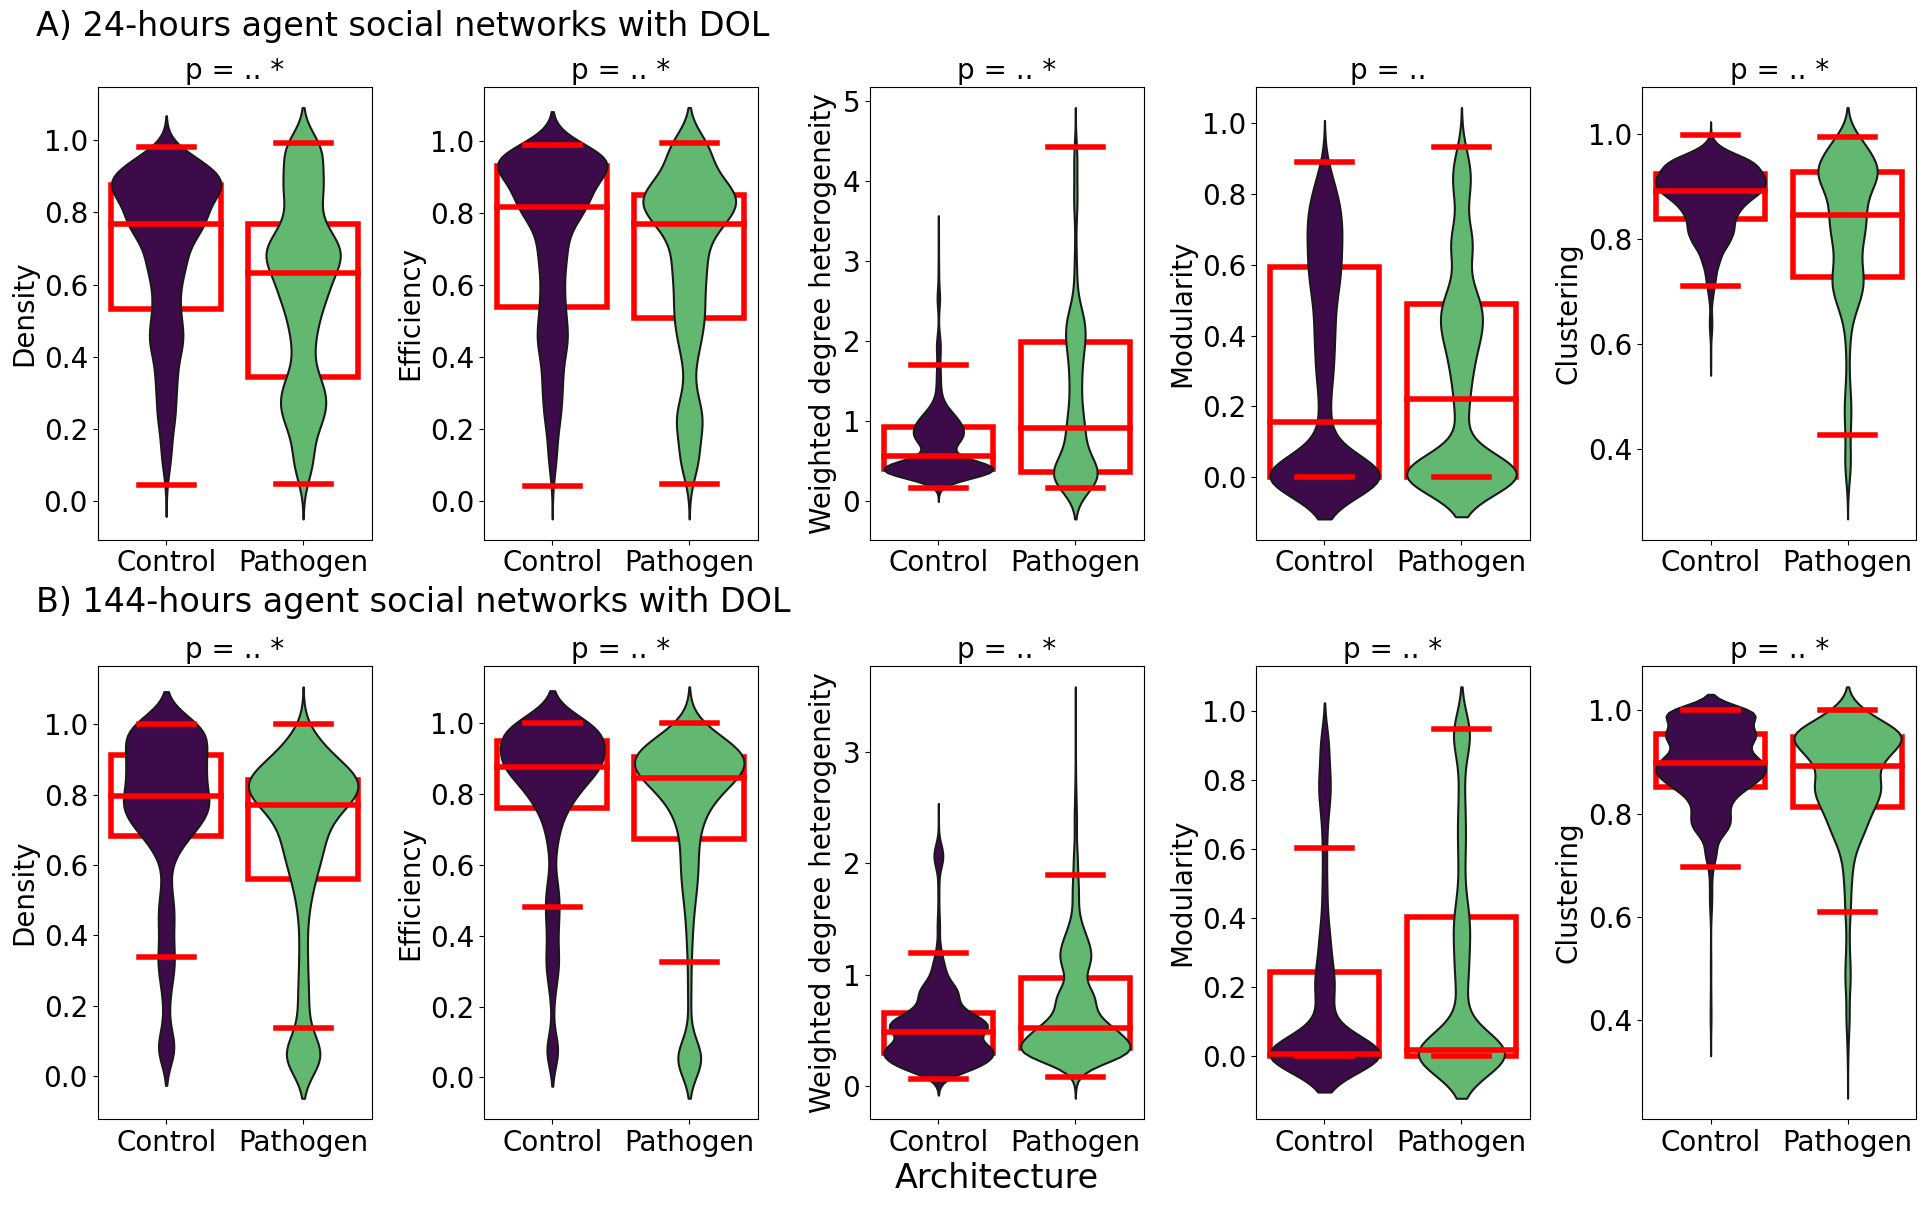

In [17]:
show_mean=False
import matplotlib.pyplot as plt
import seaborn as sns
error_col='blue'
variables = ['Density', 'Efficiency', 'Weighted degree heterogeneity', 'Modularity', 'Clustering']

palette=['#440154FF', '#55C667FF']
labsize = 20  # example value, adjust as needed
titsize = 24  # example value, adjust as needed

fig, axes = plt.subplots(2, 5, figsize=(20, 12))

# Increase spacing between subplots
plt.tight_layout(pad=5.0)

df_wed = result_df[result_df['day_list'] == 'WED']
df_mon = result_df[result_df['day_list'] == 'MON']
Z = 0.99
for i, variable in enumerate(variables):
    print(variable)
    
    # Convert to numeric
    result_df[variable] = pd.to_numeric(result_df[variable], errors='coerce')
    mon_means = df_mon.groupby('Architecture')[variable].mean()
    df_wed[variable] = pd.to_numeric(df_wed[variable], errors='coerce')
    df_mon[variable] = pd.to_numeric(df_mon[variable], errors='coerce')
    se_wed = df_wed.groupby('Architecture')[variable].sem()
    se_mon = df_mon.groupby('Architecture')[variable].sem()
    mean_wed = df_wed.groupby('Architecture')[variable].mean()
#     std_wed = df_wed.groupby('Architecture')[variable].std()
#     n_wed = df_wed.groupby('Architecture')[variable].count()
#     ci_wed_upper = mean_wed + (Z * (std_wed / np.sqrt(n_wed)))
#     ci_wed_lower = mean_wed - (Z * (std_wed / np.sqrt(n_wed)))
    mean_mon = df_mon.groupby('Architecture')[variable].mean()
#     std_mon = df_mon.groupby('Architecture')[variable].std()
#     n_mon = df_mon.groupby('Architecture')[variable].count()
#     ci_mon_upper = mean_mon + (Z * (std_mon / np.sqrt(n_mon)))
#     ci_mon_lower = mean_mon - (Z * (std_mon / np.sqrt(n_mon)))
    # Violin plot for Wednesday
    sns.violinplot(ax=axes[0, i], data=df_wed, x='Architecture', y=variable, palette=palette, inner=None)
    sns.boxplot(ax=axes[0, i], data=df_wed, x='Architecture', y=variable, \
        boxprops=dict(facecolor='none', edgecolor=boxcol),\
            whiskerprops=dict(color=whiskcol),
        capprops=dict(color=capcol),
        medianprops=dict(color=median_col),\
            showfliers=False, linewidth=linwt) # Set tick label size

    # Drawing horizontal bars at mean values for Wednesday
    if show_mean==True:
        for j, treat in enumerate(df_wed['Architecture'].unique()):
            y_val = mean_wed[treat]
            axes[0, i].hlines(y_val, j-0.4, j+0.4, color='red', lw=3)
    #         axes[0, i].hlines(ci_wed_upper[treat], j-0.4, j+0.4, color='black', lw=2)  # CI upper bound
    #         axes[0, i].hlines(ci_wed_lower[treat], j-0.4, j+0.4, color='black', lw=2)  # CI lower bound

        for j, treat in enumerate(df_mon['Architecture'].unique()):
            y_val = mean_mon[treat]
            axes[1, i].hlines(y_val, j-0.4, j+0.4, color='red', lw=3)
            #axes[1, i].hlines(ci_mon_upper[treat], j-0.4, j+0.4, color='black', lw=2)  # CI upper bound
            #axes[1, i].hlines(ci_mon_lower[treat], j-0.4, j+0.4, color='black', lw=2)  # CI lower bound


    # Violin plot for Monday
    sns.violinplot(ax=axes[1, i], data=df_mon, x='Architecture', y=variable, palette=palette, inner=None)
    sns.boxplot(ax=axes[1, i], data=df_mon, x='Architecture', y=variable, \
        boxprops=dict(facecolor='none', edgecolor=boxcol),\
            whiskerprops=dict(color=whiskcol),
        capprops=dict(color=capcol),
        medianprops=dict(color=median_col),\
            showfliers=False, linewidth=linwt)
    axes[0, i].set_xlabel('')  # Remove individual x-label
    axes[1, i].set_xlabel('')  # Remove individual x-label
    axes[0, i].tick_params(axis='x', labelsize=labsize)  # Set tick label size
    axes[1, i].tick_params(axis='x', labelsize=labsize)  # Set tick label size
    axes[0, i].tick_params(axis='y', labelsize=labsize)
    axes[1, i].tick_params(axis='y', labelsize=labsize)

    # Drawing horizontal bars at mean values for Monday
  # Set y-label size
    axes[0, i].set_ylabel(variable, fontsize=labsize)
    axes[1, i].set_ylabel(variable, fontsize=labsize)
# After plotting the violins, and before displaying the plots:
# Set one big x-title for the entire figure
axes[0,0].set_title(f"p = .. *", fontsize=labsize)
axes[0,1].set_title(f"p = .. *", fontsize=labsize)
axes[0,2].set_title(f"p = .. *", fontsize=labsize)
axes[0,3].set_title(f"p = .. ", fontsize=labsize)
axes[0,4].set_title(f"p = .. *", fontsize=labsize)

axes[1,0].set_title(f"p = .. *", fontsize=labsize)
axes[1,1].set_title(f"p = .. *", fontsize=labsize)
axes[1,2].set_title(f"p = .. *", fontsize=labsize)
axes[1,3].set_title(f"p = .. *", fontsize=labsize)
axes[1,4].set_title(f"p = .. *", fontsize=labsize)

fig.text(0.5, 0.02, 'Architecture', ha='center', fontsize=titsize)
fig.text(0.02, 0.98, 'A) 24-hours agent social networks with DOL', ha='left', fontsize=titsize)
fig.text(0.02, 0.5, 'B) 144-hours agent social networks with DOL', ha='left', fontsize=titsize)

fig.subplots_adjust(hspace=0.28)  # Adjust the value as neede
plt.show()


In [18]:
DOL='0'
max_l=100
DIR_G_ANA='/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/ABM_DATA/NET_DATA/SOCIAL_NET_ANA'
files = [ f.path for f in os.scandir(DIR_G_ANA)]
l=0
dfs=[]
list_data=[]
list_nk=[]
t_range=['0-3', '3-6', '6-9', '9-12']
subset_list=[1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,9,9,10,10,1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,9,9,10,10]
for file in range(0,len(files)):
    nodes1_filename = os.path.basename(files[file])
    #it = re.search(r'_IT_([\d_]+)', nodes1_filename).group(1)
    it =  re.search(r"_([\d\.]+)\.pickle$", nodes1_filename)
	
    # Extracting numbers from square brackets
    import re

    match = re.search(r'\[([\d., -]+)\]', nodes1_filename)
    if match:
        nk = match.group(1)[0]
        #print(numbers)
    else:
        print("No match found")
    if nk!=DOL:
        continue
    s_df=pd.read_csv(files[file])
    it_list=[]
    for i in range(0,len(s_df)):
        it_list.append(l)
    s_df['iteration']=it_list
    dfs.append(s_df)
    l+=1
    if len(dfs)==max_l:
        break

result_df2 = pd.concat(dfs, ignore_index=True)
print(l)

100


In [19]:
variables = ['efficiency_list', 'heterogeneity_list', 'modularity_list', 'clustering_list']
#variables = ['assortativity_list_all', 'heterogeneity_list', 'modularity_list', 'clustering_list']

var='density_list'
result_df2[var] = result_df2[var].apply(convert_to_list)
result_df_new2 = result_df2.explode(var)
t_chunks=[]
for i in range(len(result_df_new2[var])):
    t_chunks.append(t_range[i % 4])
result_df_new2['t_chunks']=t_chunks


for var in variables:
    result_df2[var] = result_df2[var].apply(convert_to_list)  # Assuming you have the function 'convert_to_list'
    result_df3 = result_df2.explode(var)
    result_df3[var] = pd.to_numeric(result_df3[var], errors='coerce')
    print(len(result_df2), len(result_df3))
    result_df_new2[var]=result_df3[var]

4000 16000
4000 16000
4000 16000
4000 16000


In [94]:
save_dir='/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/ABM_CODE'
result_df_new2.to_csv(save_dir+'/'+DOL+'_combined_social_analysis.csv',index=False)#S+PARAMETERS
print('data saved as:', DOL+'_combined_social_analysis.csv')

data saved as: 0_combined_social_analysis.csv


In [20]:

result_df2=result_df_new2
variables = ['density_list','efficiency_list', 'heterogeneity_list', 'modularity_list', 'clustering_list']
#variables = ['assortativity_list_all','efficiency_list_all', 'heterogeneity_list_all', 'modularity_list_all', 'clustering_list_all']

new_columns = ['Density', 'Efficiency', 'Weighted degree heterogeneity', 'Modularity', 'Clustering']

# Create a dictionary mapping old column names to new column names
rename_dict = {old: new for old, new in zip(variables, new_columns)}

# Rename columns in the dataframe
result_df2 = result_df2.rename(columns=rename_dict)
result_df2 = result_df2.rename(columns={'treat_list': 'Architecture'})

# Replacing values in the new column
result_df2['Architecture'] = result_df2['Architecture'].replace({
    'SHAM': 'Control',
    'PATHOGEN': 'Pathogen'
})
result_df2 = result_df2.rename(columns={'treat_list': 'Architecture'})

# Replacing values in the new column
result_df2['Architecture'] = result_df2['Architecture'].replace({
    'SHAM': 'Control',
    'PATHOGEN': 'Pathogen'
})

Density
Efficiency


/tmp/ipykernel_53363/552168593.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wed2[variable] = pd.to_numeric(df_wed2[variable], errors='coerce')
/tmp/ipykernel_53363/552168593.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mon2[variable] = pd.to_numeric(df_mon2[variable], errors='coerce')
/tmp/ipykernel_53363/552168593.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

Weighted degree heterogeneity
Modularity


/tmp/ipykernel_53363/552168593.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wed2[variable] = pd.to_numeric(df_wed2[variable], errors='coerce')
/tmp/ipykernel_53363/552168593.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mon2[variable] = pd.to_numeric(df_mon2[variable], errors='coerce')
/tmp/ipykernel_53363/552168593.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

Clustering


/tmp/ipykernel_53363/552168593.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wed2[variable] = pd.to_numeric(df_wed2[variable], errors='coerce')
/tmp/ipykernel_53363/552168593.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mon2[variable] = pd.to_numeric(df_mon2[variable], errors='coerce')


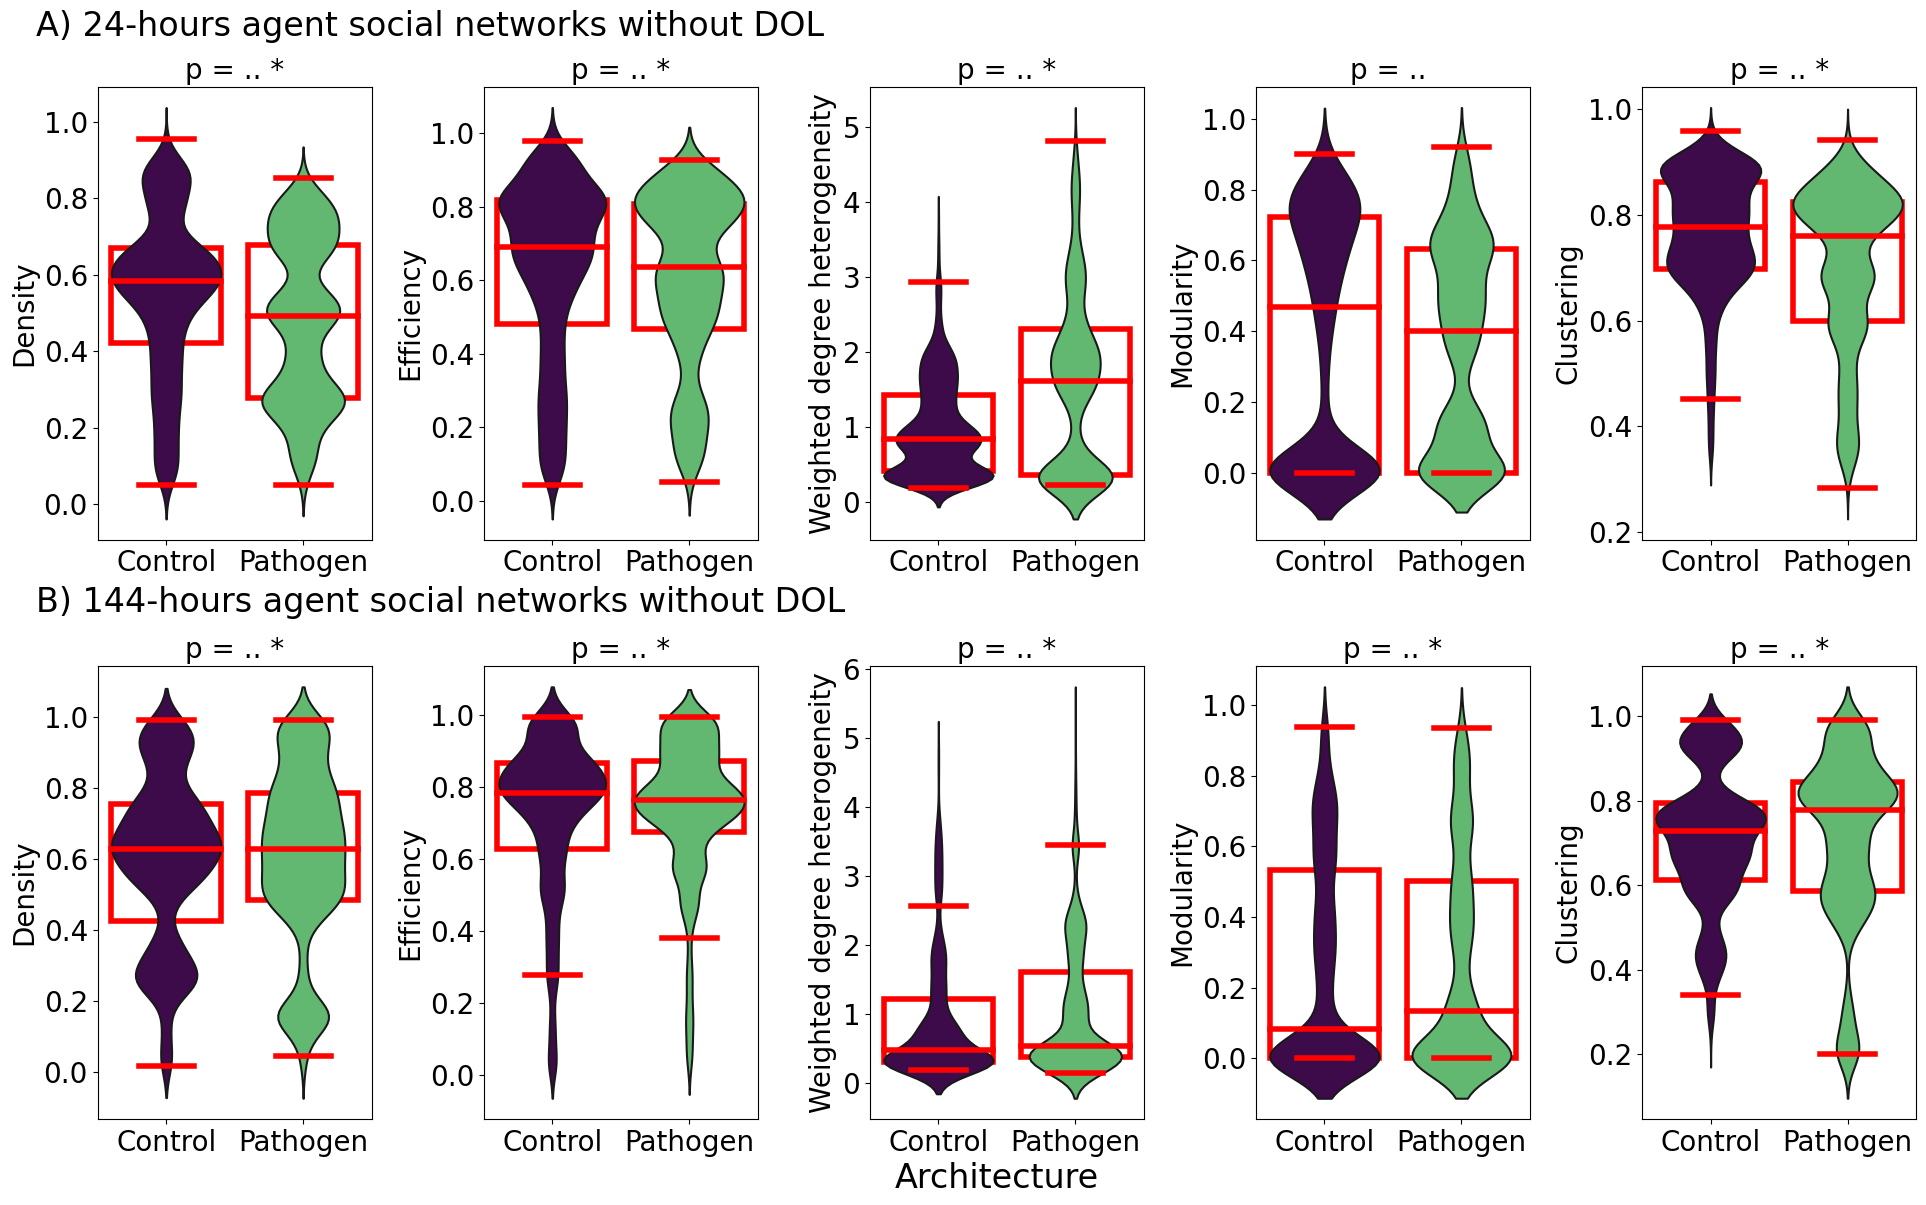

In [21]:
show_mean=False
import matplotlib.pyplot as plt
import seaborn as sns
error_col='blue'
variables = ['Density', 'Efficiency', 'Weighted degree heterogeneity', 'Modularity', 'Clustering']

palette=['#440154FF', '#55C667FF']
labsize = 20  # example value, adjust as needed
titsize = 24  # example value, adjust as needed

fig, axes = plt.subplots(2, 5, figsize=(20, 12))

# Increase spacing between subplots
plt.tight_layout(pad=5.0)

df_wed2 = result_df2[result_df2['day_list'] == 'WED']
df_mon2 = result_df2[result_df2['day_list'] == 'MON']
Z = 0.99
for i, variable in enumerate(variables):
    print(variable)
    
    # Convert to numeric
    result_df2[variable] = pd.to_numeric(result_df2[variable], errors='coerce')
    mon_means = df_mon.groupby('Architecture')[variable].mean()
    df_wed2[variable] = pd.to_numeric(df_wed2[variable], errors='coerce')
    df_mon2[variable] = pd.to_numeric(df_mon2[variable], errors='coerce')


    # Violin plot for Wednesday
    sns.violinplot(ax=axes[0, i], data=df_wed2, x='Architecture', y=variable, palette=palette, inner=None)
    sns.boxplot(ax=axes[0, i], data=df_wed2, x='Architecture', y=variable, \
        boxprops=dict(facecolor='none', edgecolor=boxcol),\
            whiskerprops=dict(color=whiskcol),
        capprops=dict(color=capcol),
        medianprops=dict(color=median_col),\
            showfliers=False, linewidth=linwt) # Set tick label size

    # Drawing horizontal bars at mean values for Wednesday
    if show_mean==True:
        for j, treat in enumerate(df_wed['Architecture'].unique()):
            y_val = mean_wed[treat]
            axes[0, i].hlines(y_val, j-0.4, j+0.4, color='red', lw=3)
    #         axes[0, i].hlines(ci_wed_upper[treat], j-0.4, j+0.4, color='black', lw=2)  # CI upper bound
    #         axes[0, i].hlines(ci_wed_lower[treat], j-0.4, j+0.4, color='black', lw=2)  # CI lower bound

        for j, treat in enumerate(df_mon['Architecture'].unique()):
            y_val = mean_mon[treat]
            axes[1, i].hlines(y_val, j-0.4, j+0.4, color='red', lw=3)
            #axes[1, i].hlines(ci_mon_upper[treat], j-0.4, j+0.4, color='black', lw=2)  # CI upper bound
            #axes[1, i].hlines(ci_mon_lower[treat], j-0.4, j+0.4, color='black', lw=2)  # CI lower bound


    # Violin plot for Monday
    sns.violinplot(ax=axes[1, i], data=df_mon2, x='Architecture', y=variable, palette=palette, inner=None)
    sns.boxplot(ax=axes[1, i], data=df_mon2, x='Architecture', y=variable, \
        boxprops=dict(facecolor='none', edgecolor=boxcol),\
            whiskerprops=dict(color=whiskcol),
        capprops=dict(color=capcol),
        medianprops=dict(color=median_col),\
            showfliers=False, linewidth=linwt)
    axes[0, i].set_xlabel('')  # Remove individual x-label
    axes[1, i].set_xlabel('')  # Remove individual x-label
    axes[0, i].tick_params(axis='x', labelsize=labsize)  # Set tick label size
    axes[1, i].tick_params(axis='x', labelsize=labsize)  # Set tick label size
    axes[0, i].tick_params(axis='y', labelsize=labsize)
    axes[1, i].tick_params(axis='y', labelsize=labsize)

    # Drawing horizontal bars at mean values for Monday
  # Set y-label size
    axes[0, i].set_ylabel(variable, fontsize=labsize)
    axes[1, i].set_ylabel(variable, fontsize=labsize)
# After plotting the violins, and before displaying the plots:
# Set one big x-title for the entire figure
axes[0,0].set_title(f"p = .. *", fontsize=labsize)
axes[0,1].set_title(f"p = .. *", fontsize=labsize)
axes[0,2].set_title(f"p = .. *", fontsize=labsize)
axes[0,3].set_title(f"p = .. ", fontsize=labsize)
axes[0,4].set_title(f"p = .. *", fontsize=labsize)

axes[1,0].set_title(f"p = .. *", fontsize=labsize)
axes[1,1].set_title(f"p = .. *", fontsize=labsize)
axes[1,2].set_title(f"p = .. *", fontsize=labsize)
axes[1,3].set_title(f"p = .. *", fontsize=labsize)
axes[1,4].set_title(f"p = .. *", fontsize=labsize)

fig.text(0.5, 0.02, 'Architecture', ha='center', fontsize=titsize)
fig.text(0.02, 0.98, 'A) 24-hours agent social networks without DOL', ha='left', fontsize=titsize)
fig.text(0.02, 0.5, 'B) 144-hours agent social networks without DOL', ha='left', fontsize=titsize)

fig.subplots_adjust(hspace=0.28)  # Adjust the value as neede
plt.show()


In [22]:
#variables = ['assortativity_list_all','efficiency_list_all', 'heterogeneity_list_all', 'modularity_list_all', 'clustering_list_all']

variables = ['Density', 'Efficiency', 'Weighted degree heterogeneity', 'Modularity', 'Clustering']
new_columns = ['Density', 'Efficiency', 'Weight. deg. het.', 'Modularity', 'Clustering']

# Create a dictionary mapping old column names to new column names
rename_dict = {old: new for old, new in zip(variables, new_columns)}

# Rename columns in the dataframe
result_df = result_df.rename(columns=rename_dict)
result_df = result_df.rename(columns={'treat_list': 'Architecture'})
result_df2 = result_df2.rename(columns=rename_dict)
result_df2 = result_df2.rename(columns={'treat_list': 'Architecture'})

Weight. deg. het.


/tmp/ipykernel_53363/301902654.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wed[variable] = pd.to_numeric(df_wed[variable], errors='coerce')
/tmp/ipykernel_53363/301902654.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mon[variable] = pd.to_numeric(df_mon[variable], errors='coerce')
/tmp/ipykernel_53363/301902654.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

Density


/tmp/ipykernel_53363/301902654.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wed[variable] = pd.to_numeric(df_wed[variable], errors='coerce')
/tmp/ipykernel_53363/301902654.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mon[variable] = pd.to_numeric(df_mon[variable], errors='coerce')
/tmp/ipykernel_53363/301902654.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

Efficiency


/tmp/ipykernel_53363/301902654.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wed[variable] = pd.to_numeric(df_wed[variable], errors='coerce')
/tmp/ipykernel_53363/301902654.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mon[variable] = pd.to_numeric(df_mon[variable], errors='coerce')
/tmp/ipykernel_53363/301902654.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

Modularity


/tmp/ipykernel_53363/301902654.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wed[variable] = pd.to_numeric(df_wed[variable], errors='coerce')
/tmp/ipykernel_53363/301902654.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mon[variable] = pd.to_numeric(df_mon[variable], errors='coerce')
/tmp/ipykernel_53363/301902654.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

Clustering


/tmp/ipykernel_53363/301902654.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wed[variable] = pd.to_numeric(df_wed[variable], errors='coerce')
/tmp/ipykernel_53363/301902654.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mon[variable] = pd.to_numeric(df_mon[variable], errors='coerce')
/tmp/ipykernel_53363/301902654.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

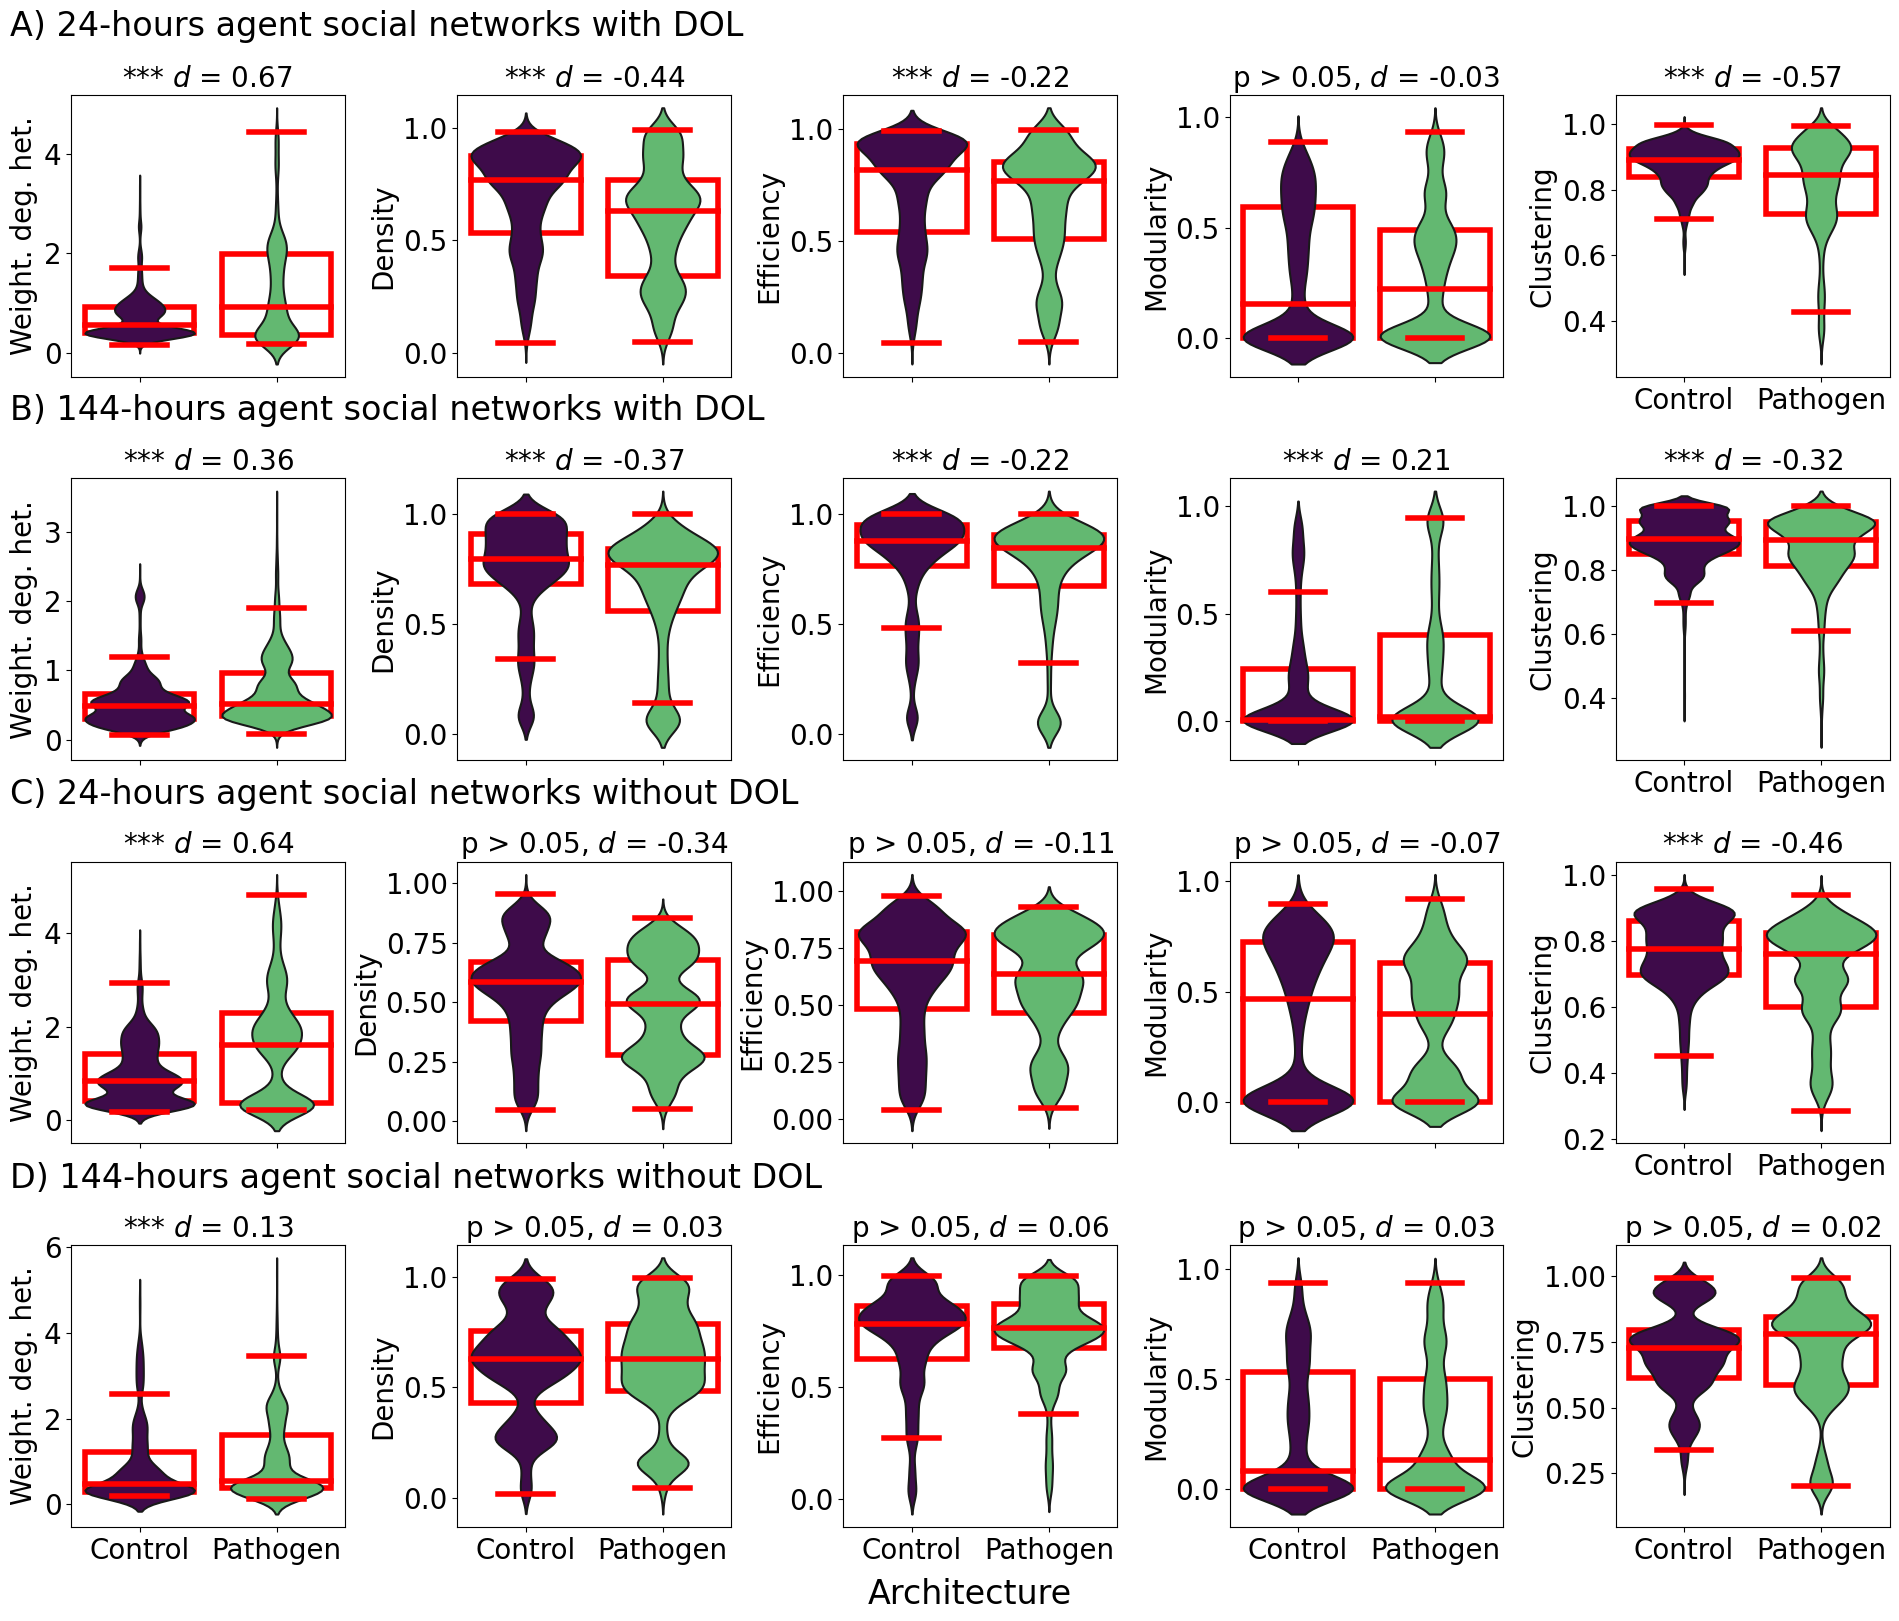

In [41]:
show_mean=False
import matplotlib.pyplot as plt
import seaborn as sns
error_col='blue'
variables = ['Weight. deg. het.', 'Density', 'Efficiency' , 'Modularity', 'Clustering']

palette=['#440154FF', '#55C667FF']
labsize = 20  # example value, adjust as needed
titsize = 24  # example value, adjust as needed

fig, axes = plt.subplots(4, 5, figsize=(20, 16))

# Increase spacing between subplots
plt.tight_layout(pad=5.0)
df_wed = result_df[result_df['day_list'] == 'WED']
df_mon = result_df[result_df['day_list'] == 'MON']
df_wed2 = result_df2[result_df2['day_list'] == 'WED']
df_mon2 = result_df2[result_df2['day_list'] == 'MON']
Z = 0.99
for i, variable in enumerate(variables):
    print(variable)
    result_df[variable] = pd.to_numeric(result_df[variable], errors='coerce')
    mon_means = df_mon.groupby('Architecture')[variable].mean()
    df_wed[variable] = pd.to_numeric(df_wed[variable], errors='coerce')
    df_mon[variable] = pd.to_numeric(df_mon[variable], errors='coerce')
    se_wed = df_wed.groupby('Architecture')[variable].sem()
    se_mon = df_mon.groupby('Architecture')[variable].sem()
    mean_wed = df_wed.groupby('Architecture')[variable].mean()
#     std_wed = df_wed.groupby('Architecture')[variable].std()
#     n_wed = df_wed.groupby('Architecture')[variable].count()
#     ci_wed_upper = mean_wed + (Z * (std_wed / np.sqrt(n_wed)))
#     ci_wed_lower = mean_wed - (Z * (std_wed / np.sqrt(n_wed)))
    mean_mon = df_mon.groupby('Architecture')[variable].mean()
#     std_mon = df_mon.groupby('Architecture')[variable].std()
#     n_mon = df_mon.groupby('Architecture')[variable].count()
#     ci_mon_upper = mean_mon + (Z * (std_mon / np.sqrt(n_mon)))
#     ci_mon_lower = mean_mon - (Z * (std_mon / np.sqrt(n_mon)))
    # Violin plot for Wednesday
    sns.violinplot(ax=axes[0, i], data=df_wed, x='Architecture', y=variable, palette=palette, inner=None)
    sns.boxplot(ax=axes[0, i], data=df_wed, x='Architecture', y=variable, \
        boxprops=dict(facecolor='none', edgecolor=boxcol),\
            whiskerprops=dict(color=whiskcol),
        capprops=dict(color=capcol),
        medianprops=dict(color=median_col),\
            showfliers=False, linewidth=linwt) # Set tick label size

    # Drawing horizontal bars at mean values for Wednesday
    if show_mean==True:
        for j, treat in enumerate(df_wed['Architecture'].unique()):
            y_val = mean_wed[treat]
            axes[0, i].hlines(y_val, j-0.4, j+0.4, color='red', lw=3)
    #         axes[0, i].hlines(ci_wed_upper[treat], j-0.4, j+0.4, color='black', lw=2)  # CI upper bound
    #         axes[0, i].hlines(ci_wed_lower[treat], j-0.4, j+0.4, color='black', lw=2)  # CI lower bound

        for j, treat in enumerate(df_mon['Architecture'].unique()):
            y_val = mean_mon[treat]
            axes[1, i].hlines(y_val, j-0.4, j+0.4, color='red', lw=3)
            #axes[1, i].hlines(ci_mon_upper[treat], j-0.4, j+0.4, color='black', lw=2)  # CI upper bound
            #axes[1, i].hlines(ci_mon_lower[treat], j-0.4, j+0.4, color='black', lw=2)  # CI lower bound


    # Violin plot for Monday
    sns.violinplot(ax=axes[1, i], data=df_mon, x='Architecture', y=variable, palette=palette, inner=None)
    sns.boxplot(ax=axes[1, i], data=df_mon, x='Architecture', y=variable, \
        boxprops=dict(facecolor='none', edgecolor=boxcol),\
            whiskerprops=dict(color=whiskcol),
        capprops=dict(color=capcol),
        medianprops=dict(color=median_col),\
            showfliers=False, linewidth=linwt)
    axes[0, i].set_xlabel('')  # Remove individual x-label
    axes[1, i].set_xlabel('')  # Remove individual x-label
    axes[0, i].tick_params(axis='x', labelsize=labsize)  # Set tick label size
    axes[1, i].tick_params(axis='x', labelsize=labsize)  # Set tick label size
    axes[0, i].tick_params(axis='y', labelsize=labsize)
    axes[1, i].tick_params(axis='y', labelsize=labsize)

    # Drawing horizontal bars at mean values for Monday
  # Set y-label size
    axes[0, i].set_ylabel(variable, fontsize=labsize)
    axes[1, i].set_ylabel(variable, fontsize=labsize)
# After plotting the violins, and before displaying the plots:
# Set one big x-title for the entire figure

    # Convert to numeric
    result_df2[variable] = pd.to_numeric(result_df2[variable], errors='coerce')
    mon_means = df_mon.groupby('Architecture')[variable].mean()
    df_wed2[variable] = pd.to_numeric(df_wed2[variable], errors='coerce')
    df_mon2[variable] = pd.to_numeric(df_mon2[variable], errors='coerce')


    # Violin plot for Wednesday
    sns.violinplot(ax=axes[2, i], data=df_wed2, x='Architecture', y=variable, palette=palette, inner=None)
    sns.boxplot(ax=axes[2, i], data=df_wed2, x='Architecture', y=variable, \
        boxprops=dict(facecolor='none', edgecolor=boxcol),\
            whiskerprops=dict(color=whiskcol),
        capprops=dict(color=capcol),
        medianprops=dict(color=median_col),\
            showfliers=False, linewidth=linwt) # Set tick label size

    # Drawing horizontal bars at mean values for Wednesday
    if show_mean==True:
        for j, treat in enumerate(df_wed['Architecture'].unique()):
            y_val = mean_wed[treat]
            axes[2, i].hlines(y_val, j-0.4, j+0.4, color='red', lw=3)
    #         axes[0, i].hlines(ci_wed_upper[treat], j-0.4, j+0.4, color='black', lw=2)  # CI upper bound
    #         axes[0, i].hlines(ci_wed_lower[treat], j-0.4, j+0.4, color='black', lw=2)  # CI lower bound

        for j, treat in enumerate(df_mon['Architecture'].unique()):
            y_val = mean_mon[treat]
            axes[2, i].hlines(y_val, j-0.4, j+0.4, color='red', lw=3)
            #axes[1, i].hlines(ci_mon_upper[treat], j-0.4, j+0.4, color='black', lw=2)  # CI upper bound
            #axes[1, i].hlines(ci_mon_lower[treat], j-0.4, j+0.4, color='black', lw=2)  # CI lower bound


    # Violin plot for Monday
    sns.violinplot(ax=axes[3, i], data=df_mon2, x='Architecture', y=variable, palette=palette, inner=None)
    sns.boxplot(ax=axes[3, i], data=df_mon2, x='Architecture', y=variable, \
        boxprops=dict(facecolor='none', edgecolor=boxcol),\
            whiskerprops=dict(color=whiskcol),
        capprops=dict(color=capcol),
        medianprops=dict(color=median_col),\
            showfliers=False, linewidth=linwt)
    axes[2, i].set_xlabel('')  # Remove individual x-label
    axes[3, i].set_xlabel('')  # Remove individual x-label
    axes[2, i].tick_params(axis='x', labelsize=labsize)  # Set tick label size
    axes[3, i].tick_params(axis='x', labelsize=labsize)  # Set tick label size
    axes[2, i].tick_params(axis='y', labelsize=labsize)
    axes[3, i].tick_params(axis='y', labelsize=labsize)
    
    # Drawing horizontal bars at mean values for Monday
  # Set y-label size
    axes[2, i].set_ylabel(variable, fontsize=labsize)
    axes[3, i].set_ylabel(variable, fontsize=labsize)
# After plotting the violins, and before displaying the plots:
# Set one big x-title for the entire figure
# axes[0,0].set_title(r"p < 0.0001, $d$ = 0.67", fontsize=labsize)
# axes[0,1].set_title(r"p < 0.0001, $d$ = -0.44", fontsize=labsize)
# axes[0,2].set_title(r"p < 0.0001, $d$ = -0.22", fontsize=labsize)
# axes[0,3].set_title(r"p < 0.989, $d$ = -0.03", fontsize=labsize)
# axes[0,4].set_title(r"p < 0.0001, $d$ = -0.57", fontsize=labsize)

# axes[1,0].set_title(r"p < 0.0001, $d$ = 0.36", fontsize=labsize)
# axes[1,1].set_title(r"p < 0.0001, $d$ = -0.37", fontsize=labsize)
# axes[1,2].set_title(r"p < 0.0001, $d$ = -0.22", fontsize=labsize)
# axes[1,3].set_title(r"p < 0.0001, $d$ = 0.21", fontsize=labsize)
# axes[1,4].set_title(r"p < 0.0001, $d$ = -0.32", fontsize=labsize)


# axes[2,0].set_title(r"p < 0.0001, $d$ = 0.64", fontsize=labsize)
# axes[2,1].set_title(r"p = 0.38, $d$ = -0.34", fontsize=labsize)
# axes[2,2].set_title(r"p = 0.62, $d$ = -0.11", fontsize=labsize)
# axes[2,3].set_title(r"p = 0.67, $d$ = -0.07", fontsize=labsize)
# axes[2,4].set_title(r"p < 0.0001, $d$ = -0.46", fontsize=labsize)

# axes[3,0].set_title(r"p < 0.0001, $d$ = 0.13", fontsize=labsize)
# axes[3,1].set_title(r"p = 0.97, $d$ = 0.03", fontsize=labsize)
# axes[3,2].set_title(r"p = 0.62, $d$ = 0.06", fontsize=labsize)
# axes[3,3].set_title(r"p = 0.67, $d$ = 0.03", fontsize=labsize)
# axes[3,4].set_title(r"p = 0.90, $d$ = 0.02", fontsize=labsize)

axes[0,0].set_title(r"*** $d$ = 0.67 ", fontsize=labsize)
axes[0,1].set_title(r"*** $d$ = -0.44", fontsize=labsize)
axes[0,2].set_title(r"*** $d$ = -0.22", fontsize=labsize)
axes[0,3].set_title(r"p > 0.05, $d$ = -0.03", fontsize=labsize)
axes[0,4].set_title(r"*** $d$ = -0.57", fontsize=labsize)

axes[1,0].set_title(r"*** $d$ = 0.36", fontsize=labsize)
axes[1,1].set_title(r"*** $d$ = -0.37", fontsize=labsize)
axes[1,2].set_title(r"*** $d$ = -0.22", fontsize=labsize)
axes[1,3].set_title(r"*** $d$ = 0.21", fontsize=labsize)
axes[1,4].set_title(r"*** $d$ = -0.32", fontsize=labsize)


axes[2,0].set_title(r"*** $d$ = 0.64", fontsize=labsize)
axes[2,1].set_title(r"p > 0.05, $d$ = -0.34", fontsize=labsize)
axes[2,2].set_title(r"p > 0.05, $d$ = -0.11", fontsize=labsize)
axes[2,3].set_title(r"p > 0.05, $d$ = -0.07", fontsize=labsize)
axes[2,4].set_title(r"*** $d$ = -0.46", fontsize=labsize)

axes[3,0].set_title(r"*** $d$ = 0.13", fontsize=labsize)
axes[3,1].set_title(r"p > 0.05, $d$ = 0.03", fontsize=labsize)
axes[3,2].set_title(r"p > 0.05, $d$ = 0.06", fontsize=labsize)
axes[3,3].set_title(r"p > 0.05, $d$ = 0.03", fontsize=labsize)
axes[3,4].set_title(r"p > 0.05, $d$ = 0.02", fontsize=labsize)

axes[0, 0].set_xticklabels([])  # Remove individual x-tick labels
axes[0, 1].set_xticklabels([])  # Remove individual x-tick labels
axes[0, 2].set_xticklabels([])  # Remove individual x-tick labels
axes[0, 3].set_xticklabels([])  # Remove individual x-tick labels
axes[1, 0].set_xticklabels([])  # Remove individual x-tick labels
axes[1, 1].set_xticklabels([])  # Remove individual x-tick labels
axes[1, 2].set_xticklabels([])  # Remove individual x-tick labels
axes[1, 3].set_xticklabels([])  # Remove individual x-tick labels
axes[2, 0].set_xticklabels([])  # Remove individual x-tick labels
axes[2, 1].set_xticklabels([])  # Remove individual x-tick labels
axes[2, 2].set_xticklabels([])  # Remove individual x-tick labels
axes[2, 3].set_xticklabels([])  # Remove individual x-tick labels


fig.text(0.5, 0.01, 'Architecture', ha='center', fontsize=titsize)
fig.text(0.02, 0.99, 'A) 24-hours agent social networks with DOL', ha='left', fontsize=titsize)
fig.text(0.02, 0.75, 'B) 144-hours agent social networks with DOL', ha='left', fontsize=titsize)

fig.text(0.02, 0.51, 'C) 24-hours agent social networks without DOL', ha='left', fontsize=titsize)
fig.text(0.02, 0.27, 'D) 144-hours agent social networks without DOL', ha='left', fontsize=titsize)

fig.subplots_adjust(hspace=0.36)  # Adjust the value as neede
plt.show()


In [28]:
DOL='0'
DIR_G_ANA='/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/ABM_DATA/NET_DATA/BIP_NET_ANA'
files = [ f.path for f in os.scandir(DIR_G_ANA)]

dfs=[]
list_data=[]
list_nk=[]
t_range=['0-3', '3-6', '6-9', '9-12']
subset_list=[1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,9,9,10,10,1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,9,9,10,10]
for file in range(0,len(files)):
    nodes1_filename = os.path.basename(files[file])
    #it = re.search(r'_IT_([\d_]+)', nodes1_filename).group(1)
    it =  re.search(r"_([\d\.]+)\.pickle$", nodes1_filename)
	
    # Extracting numbers from square brackets
    import re

    match = re.search(r'\[([\d., -]+)\]', nodes1_filename)
    if match:
        nk = match.group(1)[0]
        #print(numbers)
    else:
        print("No match found")
    if nk!=DOL:
        continue
    s_df=pd.read_csv(files[file])
    it_list=[]
    for i in range(0,len(s_df)):
        it_list.append(it)
    s_df['iteration']=it_list
    dfs.append(s_df)

result_df = pd.concat(dfs, ignore_index=True)


<Figure size 1000x600 with 0 Axes>

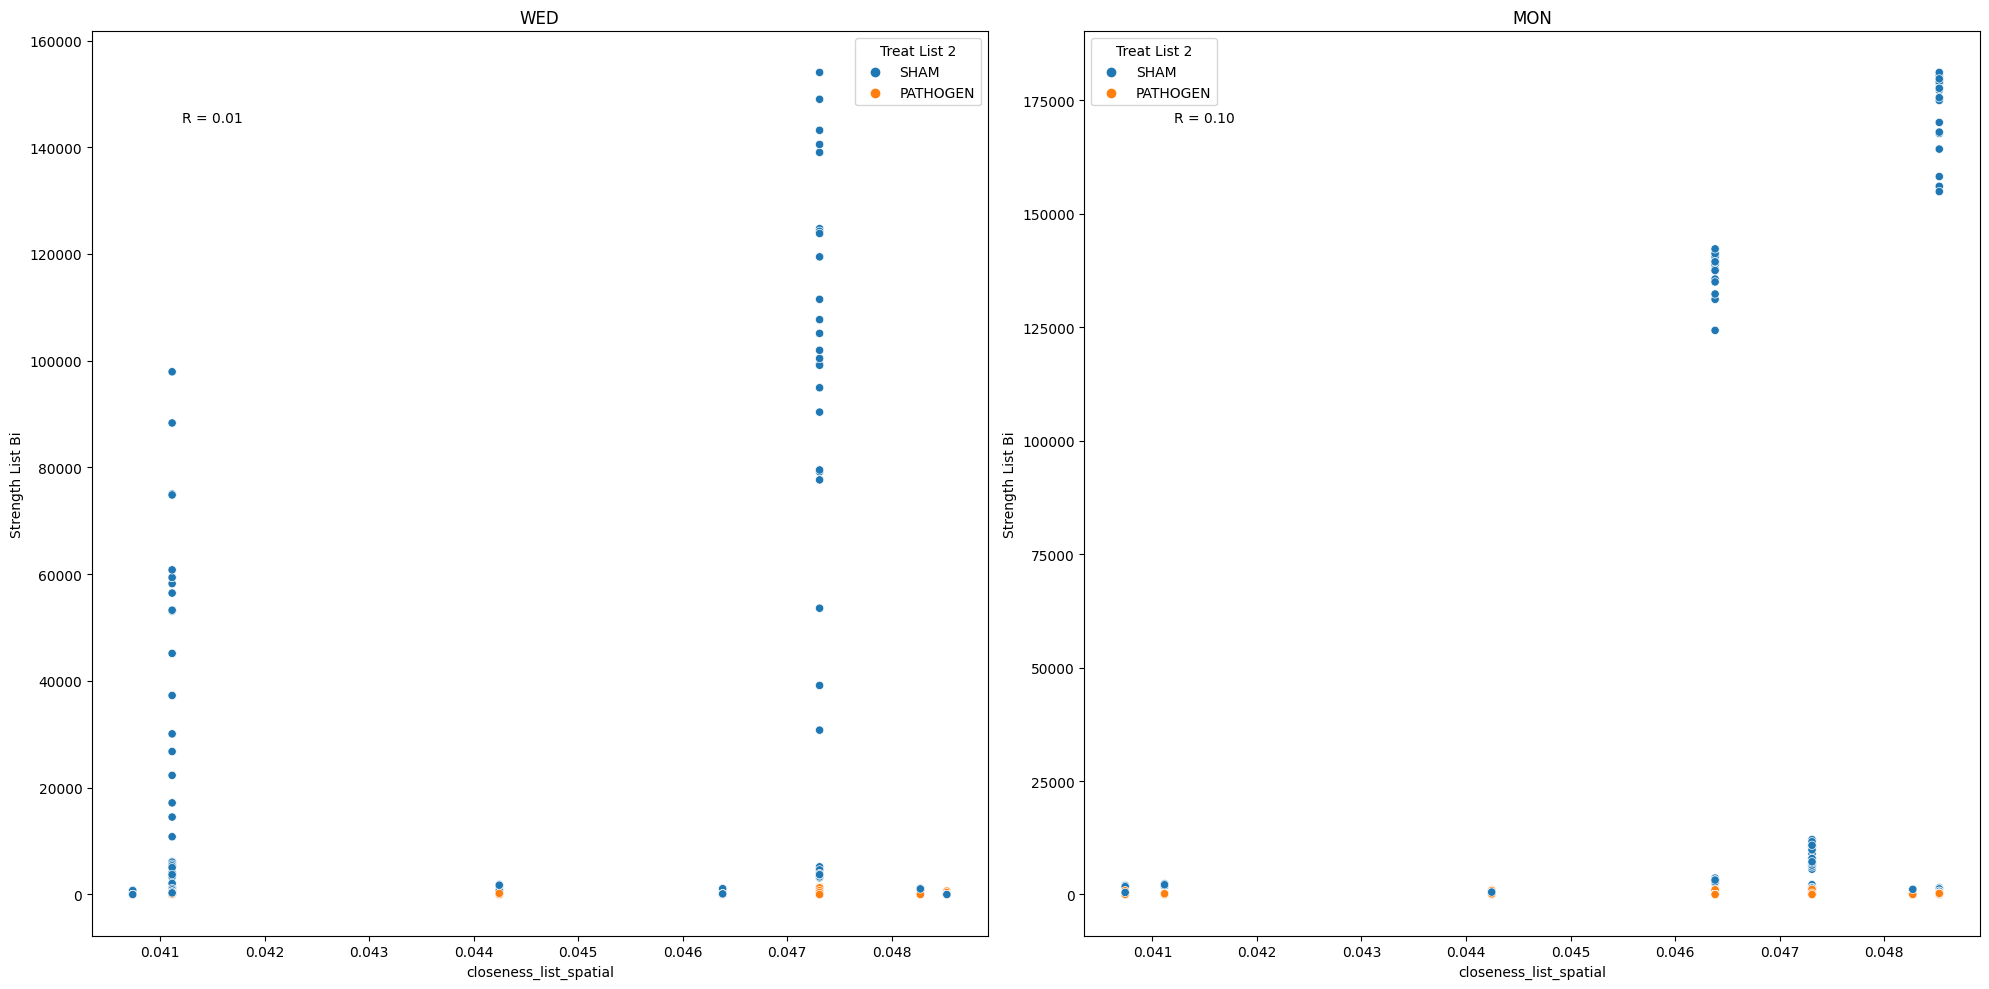

In [30]:
import seaborn as sns
variable = 'closeness_list_spatial'
plt.figure(figsize=(10, 6))
df_wed = result_df[result_df['day_list2'] == 'WED']
df_mon = result_df[result_df['day_list2'] == 'MON']


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Plot for WED
sns.scatterplot(data=df_wed, x=variable, y='strength_list_bi', hue='treat_list2', ax=axes[0])
correlation_coefficient_wed = df_wed[variable].corr(df_wed['strength_list_bi'])
axes[0].set_title('WED')
axes[0].set_xlabel(variable)
axes[0].set_ylabel('Strength List Bi')
axes[0].legend(title='Treat List 2')
axes[0].text(0.1, 0.9, f'R = {correlation_coefficient_wed:.2f}', transform=axes[0].transAxes)

# Plot for MON
sns.scatterplot(data=df_mon, x=variable, y='strength_list_bi', hue='treat_list2', ax=axes[1])
correlation_coefficient_mon = df_mon[variable].corr(df_mon['strength_list_bi'])
axes[1].set_title('MON')
axes[1].set_xlabel(variable)
axes[1].set_ylabel('Strength List Bi')
axes[1].legend(title='Treat List 2')
axes[1].text(0.1, 0.9, f'R = {correlation_coefficient_mon:.2f}', transform=axes[1].transAxes)

plt.tight_layout()
plt.show()